In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

lets load the csv files

In [3]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

print("\nTrain Columns:\n", train.columns)

train.info()


Train Shape: (891, 12)
Test Shape: (418, 11)

Train Columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [7]:
train['Survived'].value_counts()


,count
Survived,
0,549
1,342


In [8]:
train['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [9]:
train['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


The Titanic training dataset contains 891 passengers with a survival rate of about 38%, showing slightly more non-survivors than survivors. Significant missing values exist in the Cabin (77%) and Age (20%) columns, and most passengers were male and traveling in 3rd class.

i am now analyzing survival patterns across gender, passenger class, embarkation port, age, and fare to identify key trends for accurate and misleading visualizations.

# 1. Survival Rate by Gender

In [10]:
pd.crosstab(train['Sex'], train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


# 2. Survival Rate by Passenger Class

In [11]:
pd.crosstab(train['Pclass'], train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


# 3.Survival Rate by Embarked Port

In [12]:
pd.crosstab(train['Embarked'], train['Survived'], margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


# 4. Check Age Distribution

In [13]:
train['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


# 5. Check Fare Distribution

In [14]:
train['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


Survival was strongly influenced by gender and passenger class, with females and 1st-class passengers having much higher survival rates, while males and 3rd-class passengers had significantly lower survival. Age is moderately spread around 29 years, while Fare is highly skewed with extreme high values, indicating economic inequality among passengers.

Next, I will visualize these patterns using clear and ethical charts to identify the strongest insights (i.e accurate vizualizations as asked in info) before designing misleading versions.

# 1: Survival Rate by Gender

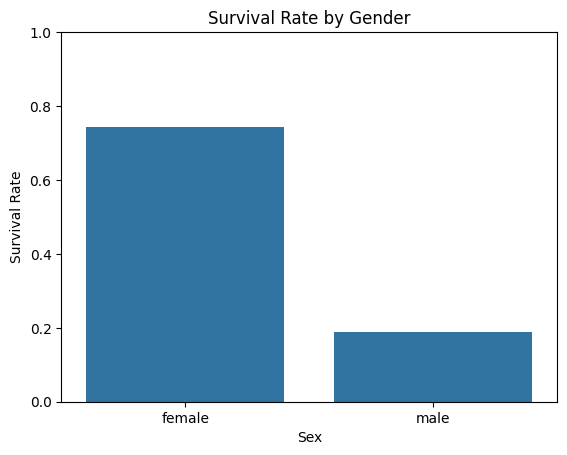

In [15]:
gender_survival = train.groupby('Sex')['Survived'].mean().reset_index()

plt.figure()
sns.barplot(data=gender_survival, x='Sex', y='Survived')

plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)

plt.show()

# 2: Survival Rate by Passenger Class

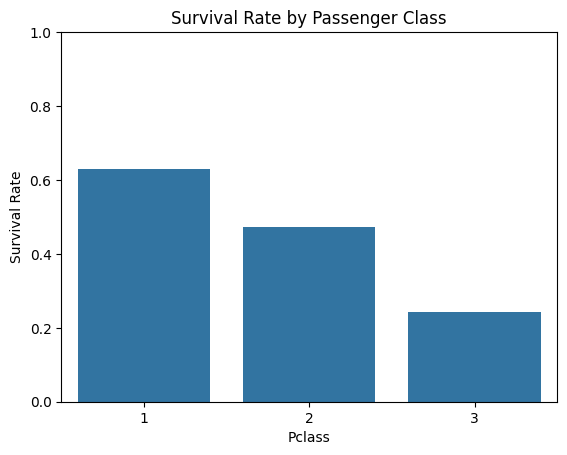

In [16]:
class_survival = train.groupby('Pclass')['Survived'].mean().reset_index()

plt.figure()
sns.barplot(data=class_survival, x='Pclass', y='Survived')

plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)

plt.show()

The visualizations clearly show that females had a significantly higher survival rate (~75%) compared to males (~20%), highlighting a strong gender-based survival disparity. Similarly, 1st-class passengers had the highest survival rate (~62%), while 3rd-class passengers had the lowest (~24%), demonstrating clear socioeconomic inequality in survival outcomes.

Next, I will intentionally create misleading visualizations by manipulating axis scales and visual emphasis to demonstrate how design choices can distort interpretation.

# 1: Truncated Y-Axis (Gender)

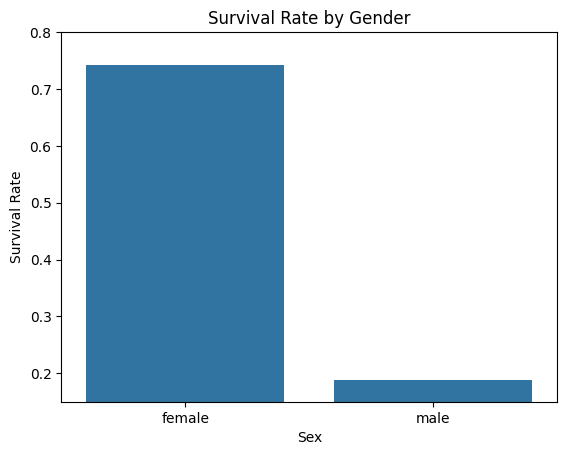

In [17]:
plt.figure()
sns.barplot(data=gender_survival, x='Sex', y='Survived')

plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")

plt.ylim(0.15, 0.80)

plt.show()

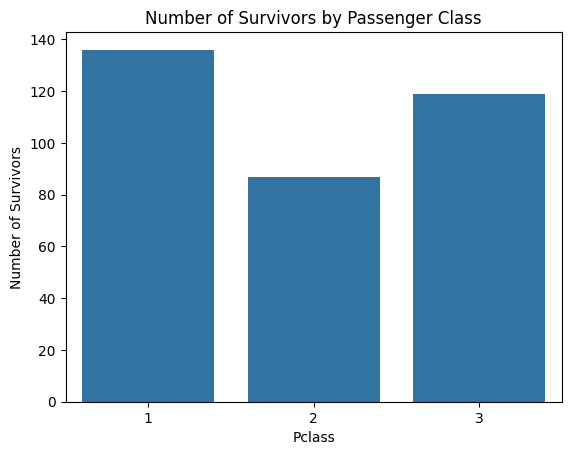

In [18]:
class_counts = train.groupby('Pclass')['Survived'].sum().reset_index()

plt.figure()
sns.barplot(data=class_counts, x='Pclass', y='Survived')

plt.title("Number of Survivors by Passenger Class")
plt.ylabel("Number of Survivors")

plt.show()

The misleading visualizations exaggerate differences by manipulating axis scales and visual emphasis, making survival gaps appear more dramatic than they truly are. By altering presentation (such as truncating the y-axis or focusing only on certain aspects), the same data can create a stronger emotional impact and potentially distort interpretation.

Next, I will create two additional misleading visualizations using selective data filtering and distorted scaling to further demonstrate ethical concerns in visualization design.

# 3: Cherry-Picking Only 1st and 3rd Class

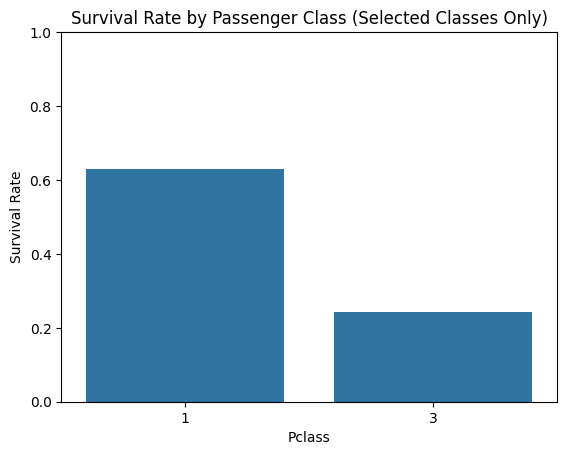

In [19]:
filtered_data = train[train['Pclass'] != 2]

filtered_survival = filtered_data.groupby('Pclass')['Survived'].mean().reset_index()

plt.figure()
sns.barplot(data=filtered_survival, x='Pclass', y='Survived')

plt.title("Survival Rate by Passenger Class (Selected Classes Only)")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)

plt.show()

# 4: Overloaded Pie Chart (Gender Survival Counts)

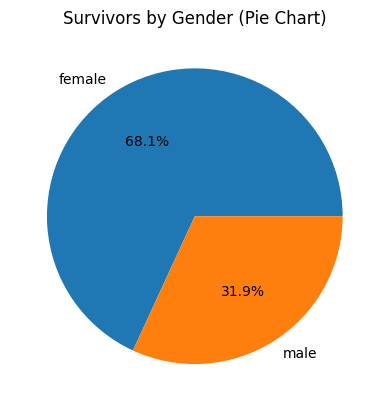

In [20]:
gender_counts = train[train['Survived'] == 1]['Sex'].value_counts()

plt.figure()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

plt.title("Survivors by Gender (Pie Chart)")
plt.show()

The cherry-picked class visualization exaggerates inequality by only showing 1st and 3rd class, making the survival gap appear more extreme than when all classes are included. The survivor-only pie chart misleads by showing gender distribution among survivors without accounting for total passengers, distorting the true survival rate comparison.

Next, I will prepare clean comparison visualizations (accurate vs misleading side-by-side) to clearly demonstrate ethical versus unethical visualization practices for our final report.

# 1: Accurate vs Misleading (Gender)

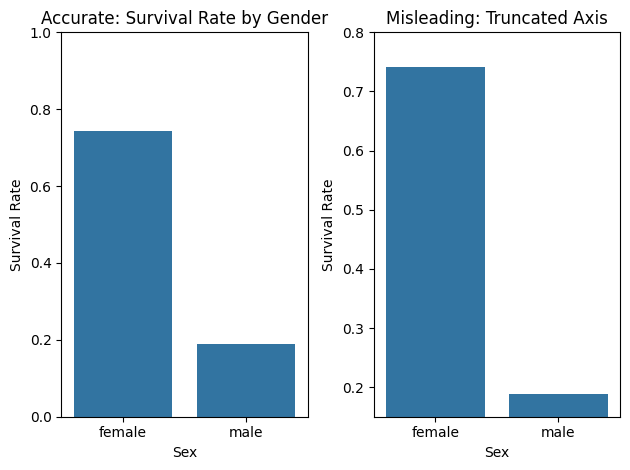

In [21]:
fig, axes = plt.subplots(1, 2)

sns.barplot(data=gender_survival, x='Sex', y='Survived', ax=axes[0])
axes[0].set_title("Accurate: Survival Rate by Gender")
axes[0].set_ylim(0, 1)
axes[0].set_ylabel("Survival Rate")

sns.barplot(data=gender_survival, x='Sex', y='Survived', ax=axes[1])
axes[1].set_title("Misleading: Truncated Axis")
axes[1].set_ylim(0.15, 0.80)
axes[1].set_ylabel("Survival Rate")

plt.tight_layout()
plt.show()

# 2: Accurate vs Misleading (Passenger Class)

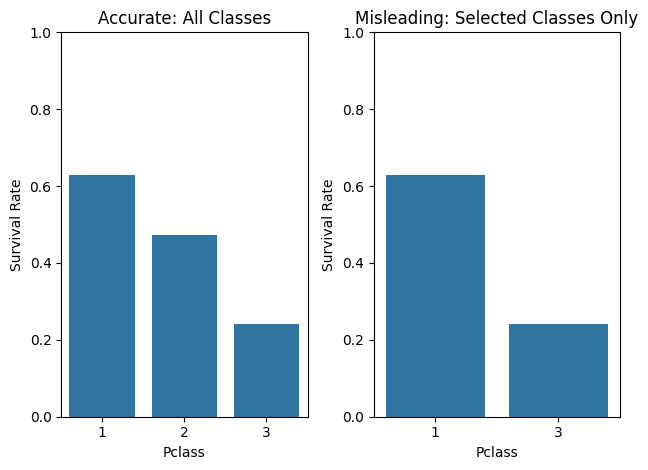

In [22]:
fig, axes = plt.subplots(1, 2)

sns.barplot(data=class_survival, x='Pclass', y='Survived', ax=axes[0])
axes[0].set_title("Accurate: All Classes")
axes[0].set_ylim(0, 1)
axes[0].set_ylabel("Survival Rate")

sns.barplot(data=filtered_survival, x='Pclass', y='Survived', ax=axes[1])
axes[1].set_title("Misleading: Selected Classes Only")
axes[1].set_ylim(0, 1)
axes[1].set_ylabel("Survival Rate")

plt.tight_layout()
plt.show()

The side-by-side comparisons clearly demonstrate how visualization design choices—such as truncating the y-axis or omitting categories can significantly distort how viewers interpret the same underlying data. While the accurate charts present a fair and complete picture, the misleading versions manipulate perception by exaggerating differences or hiding important context.

Next, I will formally document these visualizations by writing clear explanation paragraphs and an ethical analysis section for the final report in google doc.